In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [14]:
def plotGridCV(grid_cv):
    cv_results = pd.DataFrame(grid_cv.cv_results_)
    for param in grid_cv.best_params_.keys():
        result_subset = cv_results
        title_arr = []
        for param_p in grid_cv.best_params_.keys():
            if param_p == param: continue
            result_subset = result_subset[result_subset["param_"+param_p] == grid_cv.best_params_[param_p]]
            title_arr.append("{0}: {1}".format(param_p,grid_cv.best_params_[param_p]))
        plt.plot(result_subset["param_"+param],result_subset['mean_test_score'])
        plt.plot(result_subset["param_"+param],result_subset['mean_train_score'])
        plt.xlabel(param)
        plt.title(", ".join(title_arr))
        plt.show()

In [2]:
data = pd.read_csv('mnist_train.csv')

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = data['label']
X = data.drop(['label'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=99)

In [12]:
k = 5
tree = DecisionTreeClassifier()
params = {"max_depth":range(10,81,10), "min_samples_leaf": range(5,26,5)}
dtree = GridSearchCV(tree,params,scoring="accuracy",n_jobs=-1,cv=k,return_train_score=True,verbose=1)
dtree.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 81, 10),
                         'min_samples_leaf': range(5, 26, 5)},
             return_train_score=True, scoring='accuracy', verbose=1)

{'max_depth': 80, 'min_samples_leaf': 5}


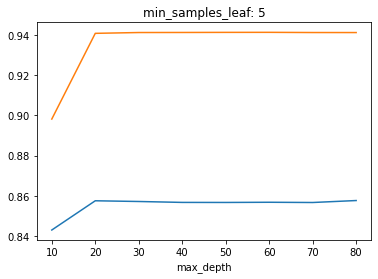

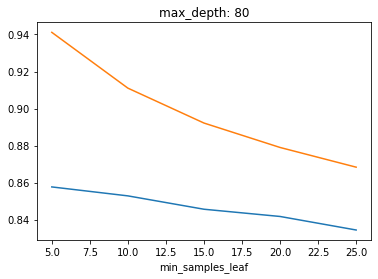

In [16]:
print(dtree.best_params_)
plotGridCV(dtree)

In [17]:
from sklearn.metrics import accuracy_score,classification_report

In [18]:
final_dt = dtree.best_estimator_
y_pred = final_dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1845
           1       0.93      0.95      0.94      1962
           2       0.82      0.85      0.84      1747
           3       0.85      0.83      0.84      1797
           4       0.86      0.88      0.87      1761
           5       0.80      0.80      0.80      1600
           6       0.88      0.88      0.88      1780
           7       0.92      0.89      0.90      1945
           8       0.81      0.79      0.80      1784
           9       0.83      0.82      0.82      1779

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



In [19]:
n_estimators = range(1,200,3)
ab_model_init = AdaBoostClassifier(base_estimator=dtree.best_estimator_,n_estimators=100)
ab_model_init.fit(X_train,y_train)
y_pred = ab_model_init.predict(X_test)
print(accuracy_score(y_test,y_pred))
# ab_grid = GridSearchCV(ab_model_init)
# for n_est in n_estimators:
#     ABC = AdaBoostClassifier(base_estimator=base_classifier,n_estimators=n_est)
#     ABC.fit(X_train,y_train)
#     y_pred = ABC.predict(X_test)
#     abc_scores.append(accuracy_score(y_test,y_pred))

0.9682222222222222


In [31]:
test_data = pd.read_csv('mnist_test.csv')
y_test = test_data['label']
X_test = test_data.drop(['label'],axis=1)

In [35]:
ab_model_init.score(X_test,y_test)

0.9644

#### Adaboost was able to give very good results as compared to Decision tree. FInal test accuracy of 96.4% was achieved.